### Entrenamiento modelo ML para predicción de precios con datos de Portal Inmobiliario

In [169]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r'C:\Users\gonza\Desktop\App_streamlit')
os.listdir()

['alquiler_portalinmobiliario.csv']

In [192]:
datos = pd.read_csv('alquiler_portalinmobiliario.csv')
datos.head(5)

,Unnamed: 0,id,link,titulo,precio,direction,superficie_total,superficie_util,superficie_terraza,ambientes,...,numero_piso_unidad,codigo,fecha,published_time,latitude,longitude,comuna,published,divisa,region
0,0,1,https://www.portalinmobiliario.com/mlc-1321634...,edificio av. departamental- vista norte piso 16,400000.0,"av. departamental 900 - 1200, lo vial, san miguel",34.0,34.0,0.0,3,...,16,459500,2023-02-11 00:00:00.000000,publicado hace 2 días por assetplan chile,-33.504288,-70.650536,San miguel,2023-02-10 17:56:38.667783,pesos,Rm (metropolitana)
1,1,2,https://www.portalinmobiliario.com/mlc-1321564...,edificio garcía reyes- vista poniente piso 5,410000.0,"garcía reyes 1 - 300, barrio yungay, santiago",5438.0,52.0,2.0,3,...,5,329093,2023-02-11 00:00:00.000000,publicado hace 2 días por assetplan chile,-33.444885,-70.670891,Santiago,2023-02-10 17:56:38.667831,pesos,Rm (metropolitana)
2,2,3,https://www.portalinmobiliario.com/mlc-1321897...,edificio arquería- vista norponiente piso 3,1950000.0,"arquería 1200 - 1500, rotonda atenas, las condes",190.0,140.0,50.0,5,...,3,458633,2023-02-11 00:00:00.000000,publicado hace 2 días por assetplan chile,-33.420437,-70.563446,Las condes,2023-02-10 17:56:38.667839,pesos,Rm (metropolitana)
3,3,4,https://www.portalinmobiliario.com/mlc-1318618...,edificio borgetto- vista norponiente piso 1,305500.0,"radal 1200 - 1500, blanqueado, quinta normal",389.0,32.0,62.0,2,...,1,217301,2023-02-11 00:00:00.000000,publicado hace 4 días por assetplan chile,-33.437840,-70.703300,Quinta normal,2023-02-08 17:56:38.667845,pesos,Rm (metropolitana)
4,4,5,https://www.portalinmobiliario.com/mlc-1321526...,edificio carmen- vista sur piso 2,365000.0,"carmen 1 - 300, santa isabel, santiago",38.0,33.0,5.0,2,...,2,458745,2023-02-11 00:00:00.000000,publicado hace 2 días por assetplan chile,-33.444862,-70.642990,Santiago,2023-02-10 17:56:38.667851,pesos,Rm (metropolitana)


In [193]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1944 non-null   int64  
 1   id                   1944 non-null   int64  
 2   link                 1944 non-null   object 
 3   titulo               1905 non-null   object 
 4   precio               1944 non-null   float64
 5   direction            1944 non-null   object 
 6   superficie_total     1944 non-null   float64
 7   superficie_util      1944 non-null   float64
 8   superficie_terraza   1944 non-null   float64
 9   ambientes            1944 non-null   int64  
 10  dormitorios          1944 non-null   int64  
 11  banos                1944 non-null   int64  
 12  estacionamientos     589 non-null    float64
 13  cant_max_habitantes  1944 non-null   int64  
 14  bodegas              493 non-null    float64
 15  gastos_comunes       1944 non-null   f

In [194]:
datos = datos.loc[datos['precio'] > 150000]
datos = datos.dropna(subset = 'comuna')

#### Drop a columnas que tienen nulos

In [195]:
datos = datos.drop(['link','Unnamed: 0','id','titulo','published_time','fecha','published','divisa','superficie_total','direction', # Columnas inútiles
                    'estacionamientos','bodegas','orientacion','tipo_departamento','codigo','latitude','longitude','region', # Nulas
                    'gastos_comunes' # Endogeneidad
                   ], axis = 1)

#### Eliminamos las filas que tienen nulos en la comuna

#### Generamos un corrplot para entender la relación entre variables numéricas y el precio de los departamentos listados. Las variables que podrían servir para explicar el precio son la superficie útil ($\rho=$0.16), dormitorios ($\rho=$0.22), baños ($\rho=$0.23) y gastos comunes ($\rho=$0.28).

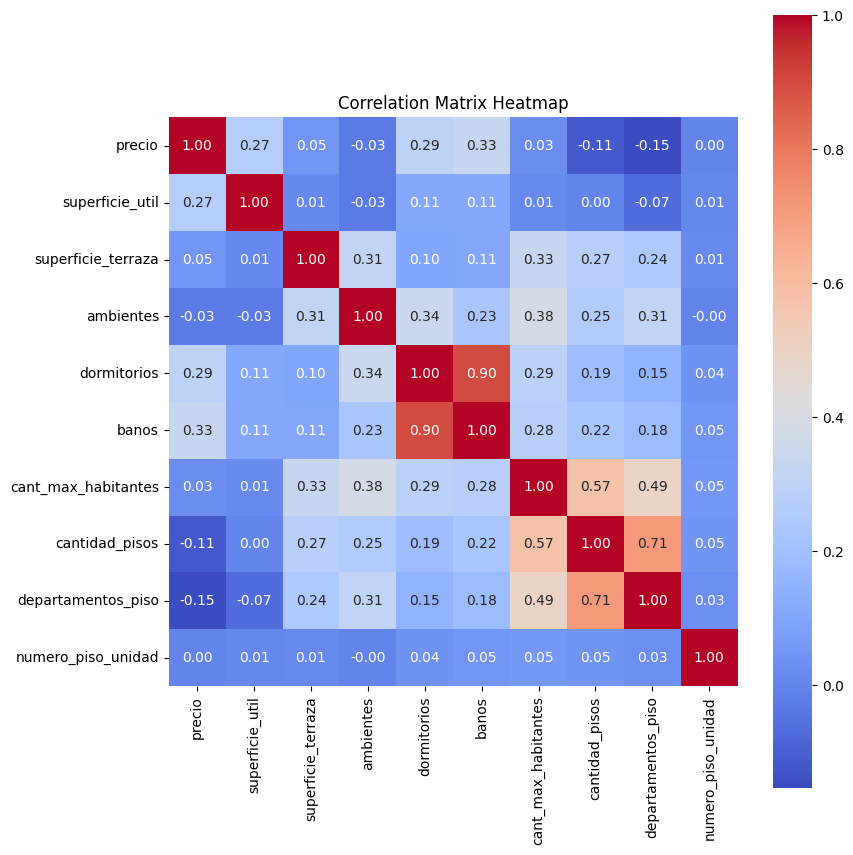

In [196]:
corr_matrix = datos.select_dtypes(['float64','int64']).corr()

# Plot corrplot como un mapa de calor
plt.figure(figsize=(9, 9))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

#### Seleccionamos las variables con alta correlación mencionadas anteriormente (filtro por correlación, no la mejor práctica, pero para el ejemplo ilustrativo sirve)

### Pre-procesamiento de datos para entrenar el modelo

In [197]:
comunas = pd.get_dummies(datos['comuna'], dtype = int, drop_first = True)

datos_modelo = pd.concat([datos.select_dtypes(['float64','int64']), comunas], axis = 1)
datos_modelo.head(5)

,precio,superficie_util,superficie_terraza,ambientes,dormitorios,banos,cant_max_habitantes,cantidad_pisos,departamentos_piso,numero_piso_unidad,...,San pedro de la paz,San ramón,Santiago,Temuco,Valdivia,Valparaíso,Villa alemana,Vitacura,Viña del mar,Ñuñoa
0,400000.0,34.0,0.0,3,2,1,3,23,13,16,...,0,0,0,0,0,0,0,0,0,0
1,410000.0,52.0,2.0,3,2,1,3,5,24,5,...,0,0,1,0,0,0,0,0,0,0
2,1950000.0,140.0,50.0,5,4,2,7,7,4,3,...,0,0,0,0,0,0,0,0,0,0
3,305500.0,32.0,62.0,2,1,1,2,20,17,1,...,0,0,0,0,0,0,0,0,0,0
4,365000.0,33.0,5.0,2,1,1,2,9,22,2,...,0,0,1,0,0,0,0,0,0,0


In [198]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

full_index = np.arange(len(datos_modelo))

train_idx, test_idx = train_test_split(
    full_index, test_size = 0.3, random_state = 42, shuffle = True
)

In [199]:
X_train = datos_modelo.drop('precio', axis = 1).iloc[train_idx]
X_test  = datos_modelo.drop('precio', axis = 1).iloc[test_idx]
y_train = datos_modelo['precio'].iloc[train_idx]
y_test  = datos_modelo['precio'].iloc[test_idx]

X_train = pd.DataFrame(X_train, columns = datos_modelo.drop('precio', axis = 1).columns)
X_test  = pd.DataFrame(X_test,  columns = datos_modelo.drop('precio', axis = 1).columns)

### Entrenamiento de modelos

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

param_grid = {
    'fit_intercept': [True, False],
    'positive'     : [True, False]
}

grid_lr = GridSearchCV(LinearRegression(), param_grid, cv = 5)
grid_lr.fit(X_train, y_train)

,estimator,LinearRegression()
,param_grid,"{'fit_intercept': [True, False], 'positive': [True, False]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,fit_intercept,True


In [201]:
best_model = grid_lr.best_estimator_
y_pred     = best_model.predict(X_test)

mse_lr     = mean_squared_error(y_test, y_pred)
r2score_lr = r2_score(y_test, y_pred)
mape_lr    = mean_absolute_percentage_error(y_test, y_pred)
mae_lr     = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse_lr:.2f}")
print(f"Test R2: {r2score_lr:.2f}")
print(f"Test MAPE: {mape_lr:.2f}")
print(f"Test MAE: {mae_lr:.2f}")

Test MSE: 1060162287012.91
Test R2: -7.61
Test MAPE: 0.26
Test MAE: 119715.59


In [202]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree = DecisionTreeRegressor(random_state=42)
grid_dt = GridSearchCV(estimator = tree, param_grid = param_grid, cv = 5, n_jobs = -1)
grid_dt.fit(X_train, y_train)

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [None, 3, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [203]:
best_model = grid_dt.best_estimator_
y_pred     = best_model.predict(X_test)

mse_dt     = mean_squared_error(y_test, y_pred)
r2score_dt = r2_score(y_test, y_pred)
mape_dt    = mean_absolute_percentage_error(y_test, y_pred)
mae_dt     = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse_dt:.2f}")
print(f"Test R2: {r2score_dt:.2f}")
print(f"Test MAPE: {mape_dt:.2f}")
print(f"Test MAE: {mae_dt:.2f}")

Test MSE: 40557132673.56
Test R2: 0.67
Test MAPE: 0.15
Test MAE: 79797.93


In [204]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 5]
}

rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 12)
grid_rf.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,12
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [205]:
best_model = grid_rf.best_estimator_
y_pred     = best_model.predict(X_test)

mse_rf     = mean_squared_error(y_test, y_pred)
r2score_rf = r2_score(y_test, y_pred)
mape_rf    = mean_absolute_percentage_error(y_test, y_pred)
mae_rf     = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse_rf:.2f}")
print(f"Test R2: {r2score_rf:.2f}")
print(f"Test MAPE: {mape_rf:.2f}")
print(f"Test MAE: {mae_rf:.2f}")

Test MSE: 32992423860.16
Test R2: 0.73
Test MAPE: 0.13
Test MAE: 71749.70


### Resultados modelos ordenados

In [208]:
pd.DataFrame({
    'Modelo'  : ['Linear Regression','Decision Tree','Random Forest'],
    'R2 score': [np.round(r2score_lr, 2), np.round(r2score_dt, 2), np.round(r2score_rf, 2)],
    'MAPE'    : [np.round(mape_lr, 2), np.round(mape_dt, 2), np.round(mape_rf, 2)],
    'MAE'     : [np.round(mae_lr, 2), np.round(mae_dt, 2), np.round(mae_rf, 2)]
})

,Modelo,R2 score,MAPE,MAE
0,Linear Regression,-7.61,0.26,119715.59
1,Decision Tree,0.67,0.15,79797.93
2,Random Forest,0.73,0.13,71749.70


### Descargamos el modelo para implementar en otro ambiente

In [210]:
import pickle

model_download = grid_rf.best_estimator_

with open('random_forest.pkl', 'wb') as f:
    pickle.dump(model_download, f)